## Importing

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from sklearn.preprocessing import LabelEncoder
!pip install catboost
import catboost as cb

In [0]:
df1 = pd.read_csv('train.csv')

In [0]:
df.head()

Trip_ID  Trip_Distance Type_of_Cab  ...  Var3  Gender Surge_Pricing_Type
0  T0005689460           6.77           B  ...    60  Female                  2
1  T0005689461          29.47           B  ...    78    Male                  2
2  T0005689464          41.58         NaN  ...    77    Male                  2
3  T0005689465          61.56           C  ...    74    Male                  3
4  T0005689467          54.95           C  ...   102    Male                  2

[5 rows x 14 columns]

## EDA

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131662 entries, 0 to 131661
Data columns (total 14 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Trip_ID                      131662 non-null  object 
 1   Trip_Distance                131662 non-null  float64
 2   Type_of_Cab                  111452 non-null  object 
 3   Customer_Since_Months        125742 non-null  float64
 4   Life_Style_Index             111469 non-null  float64
 5   Confidence_Life_Style_Index  111469 non-null  object 
 6   Destination_Type             131662 non-null  object 
 7   Customer_Rating              131662 non-null  float64
 8   Cancellation_Last_1Month     131662 non-null  int64  
 9   Var1                         60632 non-null   float64
 10  Var2                         131662 non-null  int64  
 11  Var3                         131662 non-null  int64  
 12  Gender                       131662 non-null  object 
 13 

In [0]:
#type of cab , cust since months, confidence

In [0]:
for i in df.columns[1:] :
    print(df[i].value_counts())
    print('\n')

30.18     65
30.74     63
29.54     61
29.58     60
31.66     60
          ..
103.44     1
100.51     1
98.62      1
79.24      1
88.37      1
Name: Trip_Distance, Length: 10326, dtype: int64


B    31136
C    28122
A    21569
D    18991
E    11634
Name: Type_of_Cab, dtype: int64


10.0    42680
2.0     11621
3.0     10351
0.0     10169
5.0      8641
1.0      8297
4.0      7726
7.0      7407
6.0      7375
8.0      6328
9.0      5147
Name: Customer_Since_Months, dtype: int64


2.70697    14
2.77608    14
2.78465    13
2.69489    12
2.77447    12
           ..
2.64184     1
2.97707     1
2.90484     1
3.19257     1
2.10775     1
Name: Life_Style_Index, Length: 55978, dtype: int64


B    40355
C    35967
A    35147
Name: Confidence_Life_Style_Index, dtype: int64


A    77597
B    29555
C     7484
D     6588
E     2717
F     1950
G     1489
H     1260
I      813
J      695
K      680
L      643
N       98
M       93
Name: Destination_Type, dtype: int64


2.75000    122
3.50000    120
3.350

In [0]:
non_cat_var = ['Trip_Distance','Life_Style_Index','Customer_Rating'] #Can round off customer rating and change it to categorical 

Var1, Var2, Var3 are very weird. Will try to find out a pattern. I am assuming it has something to do with age

In [0]:
df[df['Var3']>df['Var1']]

Trip_ID  Trip_Distance Type_of_Cab  Customer_Since_Months  \
0       T0005689460           6.77           B                    1.0   
1       T0005689461          29.47           B                   10.0   
4       T0005689467          54.95           C                   10.0   
5       T0005689469          19.06           E                   10.0   
12      T0005689479          39.73           B                   10.0   
...             ...            ...         ...                    ...   
131649  T0005908493          15.05         NaN                    9.0   
131655  T0005908507          20.18         NaN                   10.0   
131656  T0005908508          22.90           D                   10.0   
131657  T0005908509          11.72           D                    1.0   
131660  T0005908513          46.88           B                    4.0   

        Life_Style_Index Confidence_Life_Style_Index Destination_Type  \
0                2.42769                           A                A   
1                2.78245                           B                A   
4                3.03453                           B                A   
5                    NaN                         NaN                A   
12               2.84870                           C                B   
...                  ...                         ...              ...   
131649           2.73235                           A                A   
131655           2.69374                           C                F   
131656           2.51438                           A                A   
131657           2.74229                           A                A   
131660           3.04744                           A                B   

        Customer_Rating  Cancellation_Last_1Month  Var1  Var2  Var3  Gender  \
0               3.90500                         0  40.0    46    60  Female   
1               3.45000                         0  38.0    56    78    Male   
4               3.40250                         4  51.0    49   102    Male   
5               2.59750                         1  72.0    63    91    Male   
12              3.12875                         2  71.0    47    76    Male   
...                 ...                       ...   ...   ...   ...     ...   
131649          2.92500                         1  36.0    48    77  Female   
131655          4.52625                         1  48.0    47    62  Female   
131656          1.47250                         2  33.0    52    78  Female   
131657          3.28500                         0  61.0    47    76    Male   
131660          4.15750                         1  47.0    54    79    Male   

        Surge_Pricing_Type  Age  
0                        2   14  
1                        2   22  
4                        2   53  
5                        3   28  
12                       2   29  
...                    ...  ...  
131649                   2   29  
131655                   3   15  
131656                   3   26  
131657                   3   29  
131660                   2   25  

[42231 rows x 15 columns]

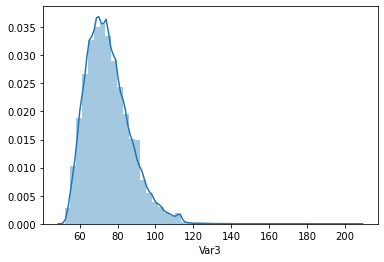

In [0]:
sns.distplot(df['Var3'])

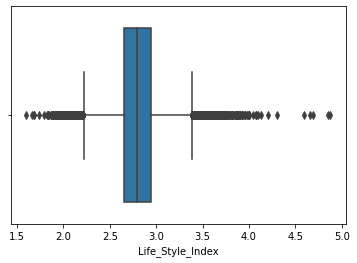

In [0]:
sns.boxplot(df['Life_Style_Index'])

## Preprocessing

In [0]:
df = df1.copy()

### KNN imputation

In [0]:
df.head()

Trip_ID  Trip_Distance Type_of_Cab  ...  Var3  Gender Surge_Pricing_Type
0  T0005689460           6.77           B  ...    60  Female                  2
1  T0005689461          29.47           B  ...    78    Male                  2
2  T0005689464          41.58         NaN  ...    77    Male                  2
3  T0005689465          61.56           C  ...    74    Male                  3
4  T0005689467          54.95           C  ...   102    Male                  2

[5 rows x 14 columns]

In [0]:
df['Var1'].fillna(0,inplace=True)
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].replace({'A':1,'B':2,'C':3},inplace=True)
df['Type_of_Cab'] = df['Type_of_Cab'].replace({'A':1,'B':2,'C':3,'D':4,'E':5})

from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
a = imputer.fit_transform(df.drop(columns=['Trip_ID','Destination_Type','Surge_Pricing_Type','Gender']))

In [0]:
'''categorical column whose values needed to be rounded off'''
c_cat = pd.DataFrame(np.round(a[:,[1,2,4]]),columns=['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index'])

'''non-categorical columns where value do not need to be and'''
c_ncat = pd.DataFrame(a[:,3],columns=['Life_Style_Index'])

In [0]:
df[['Life_Style_Index']] = c_ncat[['Life_Style_Index']]
df[['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index']] = c_cat[['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index']]

In [0]:
df['Confidence_Life_Style_Index'] = df['Confidence_Life_Style_Index'].astype(int)
df['Type_of_Cab'] = df['Type_of_Cab'].astype(int)
df['Customer_Since_Months'] = df['Customer_Since_Months'].astype(int)

In [0]:
df.head()

Trip_ID  Trip_Distance  Type_of_Cab  ...  Var3  Gender  Surge_Pricing_Type
0  T0005689460           6.77            2  ...    60  Female                   2
1  T0005689461          29.47            2  ...    78    Male                   2
2  T0005689464          41.58            2  ...    77    Male                   2
3  T0005689465          61.56            3  ...    74    Male                   3
4  T0005689467          54.95            3  ...   102    Male                   2

[5 rows x 14 columns]

### Normal preprocessing

In [0]:
df = df1.copy()

In [0]:
def pre(df):
    df['Customer_Since_Months'].fillna(-999,inplace=True)
    df['Customer_Since_Months'] = df['Customer_Since_Months'].astype(int)
    df['Var1'].fillna(0,inplace=True)
    df['Life_Style_Index'].fillna(-999,inplace=True)
    df['Type_of_Cab'].fillna(-999,inplace=True)
    df['New'] = df['Trip_Distance']*df['Type_of_Cab'].replace({'A':1,'B':2,'C':3,'D':4,'E':5})
    df['Type_of_Cab'].replace(0,-999,inplace=True)
    df['Confidence_Life_Style_Index'].fillna(-999,inplace=True)
    #df['Trip_Distance'] = df['Trip_Distance']*100
    
    return df

In [0]:
df = pre(df)

In [187]:
df.head()

Trip_ID  Trip_Distance Type_of_Cab  ...  Gender  Surge_Pricing_Type     New
0  T0005689460           6.77           B  ...  Female                   2   13.54
1  T0005689461          29.47           B  ...    Male                   2   58.94
2  T0005689464          41.58        -999  ...    Male                   2    0.00
3  T0005689465          61.56           C  ...    Male                   3  184.68
4  T0005689467          54.95           C  ...    Male                   2  164.85

[5 rows x 15 columns]

In [0]:
cat_features = ['Type_of_Cab','Customer_Since_Months','Confidence_Life_Style_Index',
                'Destination_Type','Cancellation_Last_1Month','Gender']

## Modelling

In [0]:
Z = df.drop(columns=['Surge_Pricing_Type','Trip_ID'])
y = df['Surge_Pricing_Type']

In [0]:
from catboost import Pool, cv

In [0]:
cv_dataset = Pool(data=Z,
                  label=y,
                  cat_features=cat_features)

In [0]:
params = {
    'iterations':7000,
    'logging_level':'Silent',
    'early_stopping_rounds':1000,
    'use_best_model':True,
    #'custom_loss':['AUC'],
    'loss_function':'MultiClass',
    #'class_weights':class_weights,
    'task_type':'GPU',
    'eval_metric':'Accuracy',
}

In [193]:
scores = cv(cv_dataset,
            params,
            fold_count=5, 
            plot="True")

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [195]:
print('Best validation accuracy score: {:.2f}±{:.2f} on step {}'.format(
    np.max(scores['test-Accuracy-mean']),
    scores['test-Accuracy-std'][np.argmax(scores['test-Accuracy-mean'])],
    np.argmax(scores['test-Accuracy-mean'])
))

Best validation accuracy score: 0.71±0.00 on step 1757


In [0]:
from sklearn.model_selection import train_test_split

In [0]:
x_train,x_valid,y_train,y_valid=train_test_split(Z,y,stratify=y,train_size =0.8, random_state=69)

In [0]:
model = cb.CatBoostClassifier(
        iterations=3000,logging_level="Silent",early_stopping_rounds=500,
        use_best_model=True, 
        #class_weights=class_weights, 
        task_type='GPU', 
        eval_metric="Accuracy",loss_function='MultiClass')


In [198]:
model.fit(x_train,y_train, 
        cat_features=cat_features,
        eval_set=(x_valid,y_valid),
        plot=True 
        )

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [199]:
from sklearn.metrics import accuracy_score
accuracy_score(y_valid, model.predict(x_valid))

0.7073254091823947

In [175]:
print(model.get_best_iteration())

373


In [176]:
model.best_score_

{'learn': {'Accuracy': 0.7281565380854276, 'MultiClass': 0.6402426415089861},
 'validation': {'Accuracy': 0.7073254091823947,
  'MultiClass': 0.6906779723873087}}

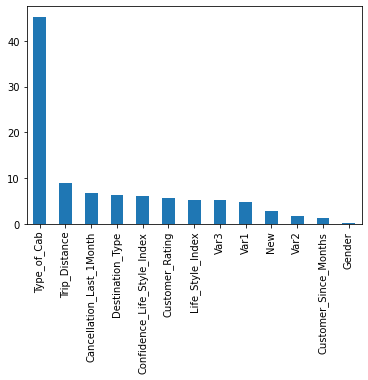

In [177]:
pd.Series(model.feature_importances_,Z.columns).sort_values(ascending=False).plot(kind='bar')

## Test Data

In [0]:
test = pd.read_csv('test.csv')

In [0]:
test = pre(test)

In [213]:
model = cb.CatBoostClassifier(
        iterations=2000,logging_level="Silent",
        #class_weights=class_weights,
        task_type='GPU', loss_function='MultiClass')
model.fit(Z,y,cat_features=cat_features)

In [0]:
Z_test = test.drop(columns = ['Trip_ID'])
yhat = model.predict(Z_test)

In [0]:
sub = pd.read_csv('sample_submission.csv')
sub['Surge_Pricing_Type'] = yhat
sub.to_csv('Submission.csv',index=None, header=True)

In [0]:
sub.head()

Trip_ID  Surge_Pricing_Type
0  T0005689459                   1
1  T0005689462                   2
2  T0005689463                   1
3  T0005689466                   2
4  T0005689468                   2

In [0]:
sub['Surge_Pricing_Type'].value_counts()

2    33607
3    18610
1    14309
D    12894
E     7975
Name: Surge_Pricing_Type, dtype: int64